Logistic Regression Project with heart disease data from Kaggle

In [44]:
#import required libraries for analysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#the data is stored in the local directory from the site and loaded here
df = pd.read_csv('heart.csv')

In [46]:
#a brief view of the first 5 rows of data and a snap shot at the shape of the data
df.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [47]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Text(0.5, 0, 'Blood Cholesterol Measure')

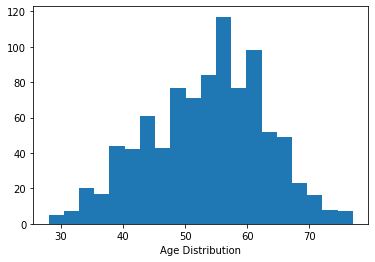

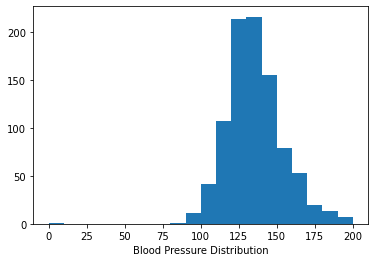

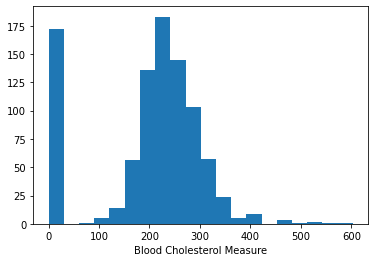

In [137]:
#histograms displaying of the data range in the sample
plt.subplots()
plt.hist(df['Age'], bins=20)
plt.xlabel('Age Distribution')
plt.subplots()
plt.hist(df['RestingBP'], bins=20)
plt.xlabel('Blood Pressure Distribution')
plt.subplots()
plt.hist(df['Cholesterol'], bins=20)
plt.xlabel('Blood Cholesterol Measure')



In [55]:
#age_sex_hd = df[['Age', 'HeartDisease','Sex']].groupby(['Age'])

In [56]:
#This cell changes the data which is labeled as catagorical data in a string format 
#in order to a numerical representation for machine learning

df['ChestPainType'] = pd.factorize(df.ChestPainType)[0] + 1
df['RestingECG'] = pd.factorize(df.RestingECG)[0] + 1
df['ExerciseAngina'] = pd.factorize(df.ExerciseAngina)[0] + 1
df['ST_Slope'] = pd.factorize(df.ST_Slope)[0] + 1
df['Sex'] = pd.factorize(df.Sex)[0] + 1


df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,1,0
1,49,2,2,160,180,0,1,156,1,1.0,2,1
2,37,1,1,130,283,0,2,98,1,0.0,1,0
3,48,2,3,138,214,0,1,108,2,1.5,2,1
4,54,1,2,150,195,0,1,122,1,0.0,1,0


In [57]:
#remove null values
df.dropna(inplace = True)

In [58]:
#the model instance is created
model = LogisticRegression(solver='liblinear', random_state=0)

In [59]:
#the data is separated into x and y variables
y = np.array(df['HeartDisease']).reshape(-1, 1)
x = df[['Age', 'Sex','ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

In [60]:
#the data is split into testing and training data
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [61]:
#model is fit with the training data
fit = model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [64]:
#the model fit is evaluated.
x_train_predict = model.predict(x_train)
accuracy = accuracy_score(x_train_predict, y_train)
accuracy = accuracy * 100
accuracy = round(accuracy, 3)
print('The model has an accuracy score of ' + str(accuracy) + '%')

The model has an accuracy score of 85.61%


In [65]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,1,0
1,49,2,2,160,180,0,1,156,1,1.0,2,1
2,37,1,1,130,283,0,2,98,1,0.0,1,0
3,48,2,3,138,214,0,1,108,2,1.5,2,1
4,54,1,2,150,195,0,1,122,1,0.0,1,0


In [121]:
#input selection for a new patient to use the model

Age = 28
Sex = 2
ChestPainType = 2
RestingBP = 130
Cholesterol = 260
FastingBS = 12
RestingECG = 1
MaxHR = 210
ExerciseAngina = 2
Oldpeak = 3
ST_Slope = 1
test_array = np.array([Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope]).reshape(1,-1)
test_data = model.predict(test_array)

In [122]:
def heart_disease(test_array):
    prediction = model.predict(test_array)
    if prediction == 1:
        return 'This patient is likely to have heart disease, with an accuracy of ' + str(accuracy) + '%'
    elif prediction ==0:
        return 'This patient is unlikely to have heart disease'

In [123]:
heart_disease(test_array)

'This patient is likely to have heart disease, with an accuracy of 85.61%'